In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datasets desde archivos Excel
data_hechos = pd.read_excel(r'C:\Users\veram\OneDrive\Escritorio\analisis data\data_transformada\hechos.xlsx')  # Corrige la comilla al final
data_victimas = pd.read_excel(r'C:\Users\veram\OneDrive\Escritorio\analisis data\data_transformada\victimas.xlsx')
data_homicidios = pd.read_excel(r'C:\Users\veram\OneDrive\Escritorio\analisis data\data_transformada\homicidios.xlsx')  # Corrige 'xlsxx' a 'xlsx'


In [2]:
# Inspección inicial
print(data_hechos.info())
print(data_hechos.describe())
print(data_victimas.info())
print(data_victimas.describe())
print(data_homicidios.info())
print(data_homicidios.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23341 entries, 0 to 23340
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_hecho           23341 non-null  object
 1   cantidad_victimas  23341 non-null  int64 
 2   año                23341 non-null  int64 
 3   mes                23341 non-null  int64 
 4   día                23341 non-null  int64 
 5   hora               23341 non-null  object
 6   participantes      23341 non-null  object
 7   victima            23341 non-null  object
 8   contraparte        23341 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.6+ MB
None
       cantidad_victimas           año           mes           día
count       23341.000000  23341.000000  23341.000000  23341.000000
mean            1.151622   2021.813333      6.542864     15.348485
std             0.575135      1.055237      3.443723      8.742222
min             1.000000   2019.000000      1.000000

In [3]:
# Conteo de valores faltantes
missing_hechos = data_hechos.isnull().sum()
missing_victimas = data_victimas.isnull().sum()
missing_homicidios = data_homicidios.isnull().sum()

print("Valores Faltantes en Hechos:\n", missing_hechos[missing_hechos > 0])
print("\nValores Faltantes en Víctimas:\n", missing_victimas[missing_victimas > 0])
print("\nValores Faltantes en Homicidios:\n", missing_homicidios[missing_homicidios > 0])

# Conteo de duplicados
print("\nDuplicados en Hechos:", data_hechos.duplicated().sum())
print("Duplicados en Víctimas:", data_victimas.duplicated().sum())
print("Duplicados en Homicidios:", data_homicidios.duplicated().sum())


Valores Faltantes en Hechos:
 Series([], dtype: int64)

Valores Faltantes en Víctimas:
 edad_victima    117
dtype: int64

Valores Faltantes en Homicidios:
 Series([], dtype: int64)

Duplicados en Hechos: 0
Duplicados en Víctimas: 0
Duplicados en Homicidios: 0


In [4]:
# Frecuencias de columnas categóricas
print("\nFrecuencia de 'año' en Hechos:\n", data_hechos['año'].value_counts())
print("\nFrecuencia de 'sexo_victima' en Víctimas:\n", data_victimas['sexo_victima'].value_counts())
print("\nFrecuencia de 'tipo_de_calle' en Homicidios:\n", data_homicidios['tipo_de_calle'].value_counts())



Frecuencia de 'año' en Hechos:
 año
2022    7847
2023    7420
2021    4471
2020    3503
2019     100
Name: count, dtype: int64

Frecuencia de 'sexo_victima' en Víctimas:
 sexo_victima
varon     16546
mujer      7942
mujer         1
varon         1
Name: count, dtype: int64

Frecuencia de 'tipo_de_calle' en Homicidios:
 tipo_de_calle
avenida      418
calle        130
gral paz      59
autopista     56
Name: count, dtype: int64


In [5]:


# Suponiendo que tienes un DataFrame llamado df_victimas
# Ejemplo de creación del DataFrame


# Corregir las inconsistencias en los nombres
data_victimas['sexo_victima'] = data_victimas['sexo_victima'].str.lower().str.strip().replace({'varon ': 'varon', 'mujer ': 'mujer'})

# Contar las frecuencias
frecuencia_sexo = data_victimas['sexo_victima'].value_counts()
print(frecuencia_sexo)


sexo_victima
varon    16547
mujer     7943
Name: count, dtype: int64


In [6]:
import pandas as pd

# Suponiendo que data_victimas es tu DataFrame
# Primero, agrupamos por año y sexo y contamos las víctimas
victimas_por_anio = data_victimas.groupby(['año', 'sexo_victima']).size().reset_index(name='cantidad')

# Luego, calculamos el total de víctimas por año
total_victimas_por_anio = victimas_por_anio.groupby('año')['cantidad'].sum().reset_index(name='total')

# Hacemos un merge para tener el total junto con la cantidad por sexo
victimas_por_anio = victimas_por_anio.merge(total_victimas_por_anio, on='año')

# Calculamos el porcentaje de cada sexo respecto al total
victimas_por_anio['porcentaje'] = (victimas_por_anio['cantidad'] / victimas_por_anio['total']) * 100

# Mostrar los resultados
print(victimas_por_anio)


    año sexo_victima  cantidad  total  porcentaje
0  2019        mujer        27    104   25.961538
1  2019        varon        77    104   74.038462
2  2020        mujer      1347   4604   29.257168
3  2020        varon      3257   4604   70.742832
4  2021        mujer      1888   5830   32.384220
5  2021        varon      3942   5830   67.615780
6  2022        mujer      2623   7661   34.238350
7  2022        varon      5038   7661   65.761650
8  2023        mujer      2058   6291   32.713400
9  2023        varon      4233   6291   67.286600


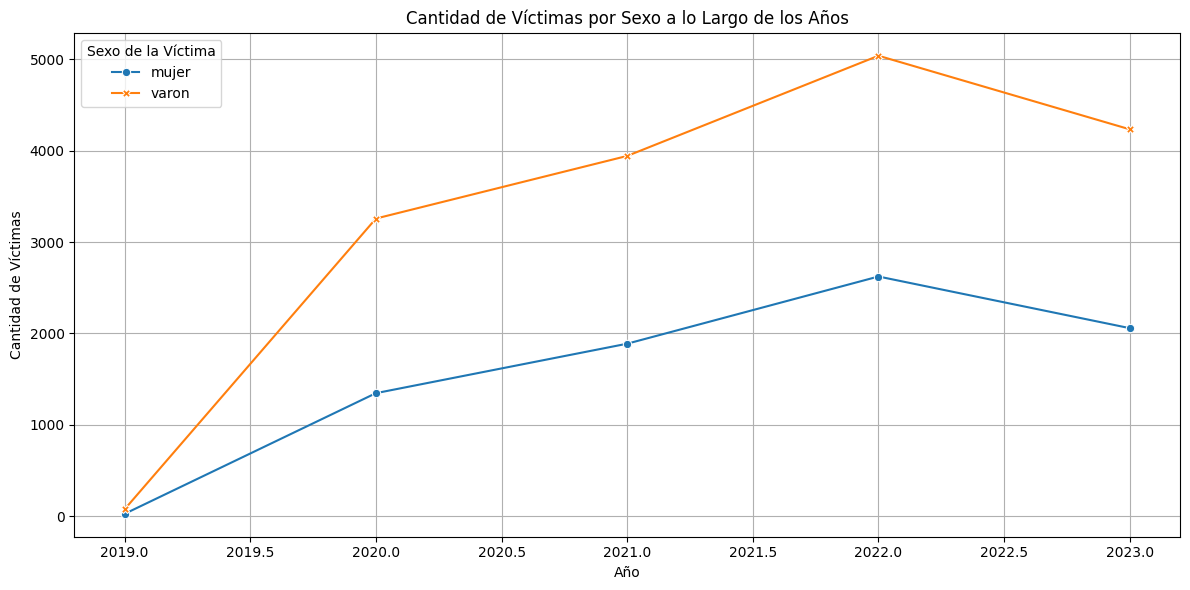

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que data_victimas es tu DataFrame
# Primero, agrupamos por año y sexo y contamos las víctimas
victimas_por_anio = data_victimas.groupby(['año', 'sexo_victima']).size().reset_index(name='cantidad')

# Luego, calculamos el total de víctimas por año
total_victimas_por_anio = victimas_por_anio.groupby('año')['cantidad'].sum().reset_index(name='total')

# Hacemos un merge para tener el total junto con la cantidad por sexo
victimas_por_anio = victimas_por_anio.merge(total_victimas_por_anio, on='año')

# Calculamos el porcentaje de cada sexo respecto al total
victimas_por_anio['porcentaje'] = (victimas_por_anio['cantidad'] / victimas_por_anio['total']) * 100

# Pivotamos los datos para que cada sexo sea una columna
victimas_pivot = victimas_por_anio.pivot(index='año', columns='sexo_victima', values='cantidad').fillna(0)

# Crear gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=victimas_pivot, dashes=False, markers=True)
plt.title('Cantidad de Víctimas por Sexo a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.legend(title='Sexo de la Víctima')
plt.grid()
plt.tight_layout()
plt.show()



conclusiones: a lo largo de los años se ve qu el numero de hombres es mayo que el numero de mujeres victimas de siniestros viales.

In [8]:
# Limpiar los nombres de las columnas
data_victimas.columns = data_victimas.columns.str.strip()


In [9]:
print(data_victimas.columns)

Index(['id_hecho', 'año', 'victima', 'sexo_victima', 'edad_victima'], dtype='object')


<Figure size 1200x600 with 0 Axes>

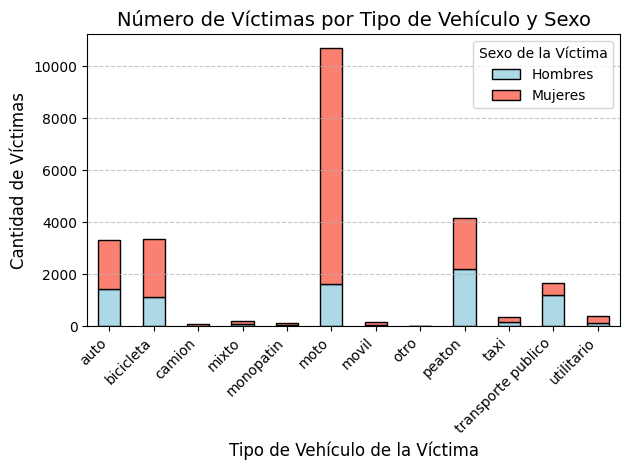

In [10]:


# Contar el número de víctimas por tipo de vehículo y sexo
victims_vehicle_sex_count = data_victimas.groupby(['victima', 'sexo_victima']).size().unstack(fill_value=0)

# Graficar
plt.figure(figsize=(12, 6))

# Graficar barras apiladas
victims_vehicle_sex_count.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], edgecolor='black')

# Añadir etiquetas
plt.title('Número de Víctimas por Tipo de Vehículo y Sexo', fontsize=14)
plt.xlabel('Tipo de Vehículo de la Víctima', fontsize=12)
plt.ylabel('Cantidad de Víctimas', fontsize=12)
plt.legend(title='Sexo de la Víctima', labels=['Hombres', 'Mujeres'], loc='upper right')
plt.xticks(rotation=45, ha='right')  # Mantener etiquetas en un ángulo
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir líneas de cuadrícula
plt.tight_layout()
plt.show()



conclusiones: Nos muestra claramente que el vehiculo con mas accidentes es la moto y que los hombre lideran notablemente el resto de

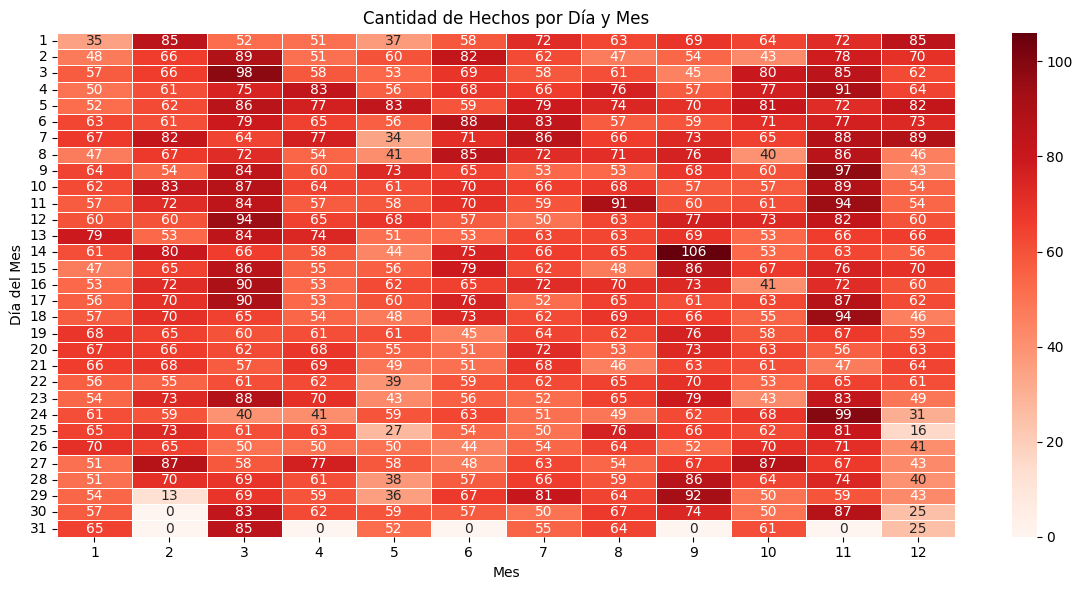

In [11]:
# Crear un pivot table para los accidentes por mes y día
heatmap_data = data_hechos.pivot_table(index='día', columns='mes', values='id_hecho', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='d', linewidths=.5)
plt.title('Cantidad de Hechos por Día y Mes')
plt.xlabel('Mes')
plt.ylabel('Día del Mes')
plt.tight_layout()
plt.show()



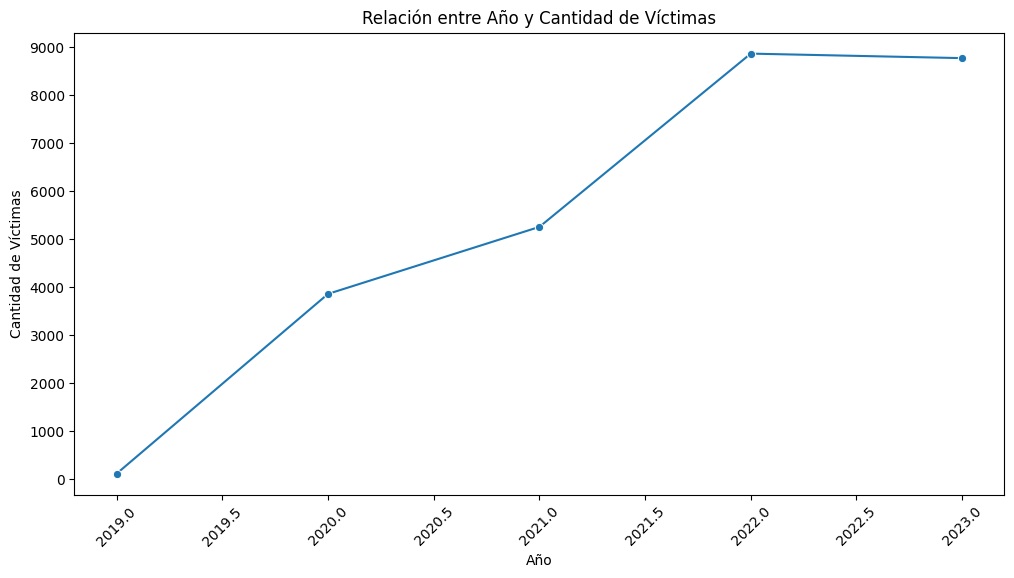

In [12]:


# Suponiendo que ya tienes un DataFrame `data_hechos` que incluye 'año' y 'cantidad_victimas'

# Agrupar los datos por año y sumar la cantidad de víctimas
victimas_por_año = data_hechos.groupby('año')['cantidad_victimas'].sum().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=victimas_por_año, x='año', y='cantidad_victimas', marker='o')
plt.title('Relación entre Año y Cantidad de Víctimas')
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.xticks(rotation=45)

# Asegurarse de que el eje Y muestre solo enteros
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()


La distribución de víctimas por sexo muestra que los hombres representan una mayoría significativa en los accidentes viales, lo cual sugiere que tienen una mayor probabilidad de estar involucrados en siniestros viales.
Implicación: Es importante enfocar las campañas de concientización y las medidas de seguridad vial hacia los grupos de mayor riesgo, en este caso, los hombres, ya que suelen ser conductores o participantes más frecuentes en accidentes graves.

ValueError: Unable to parse string "SD" at position 24

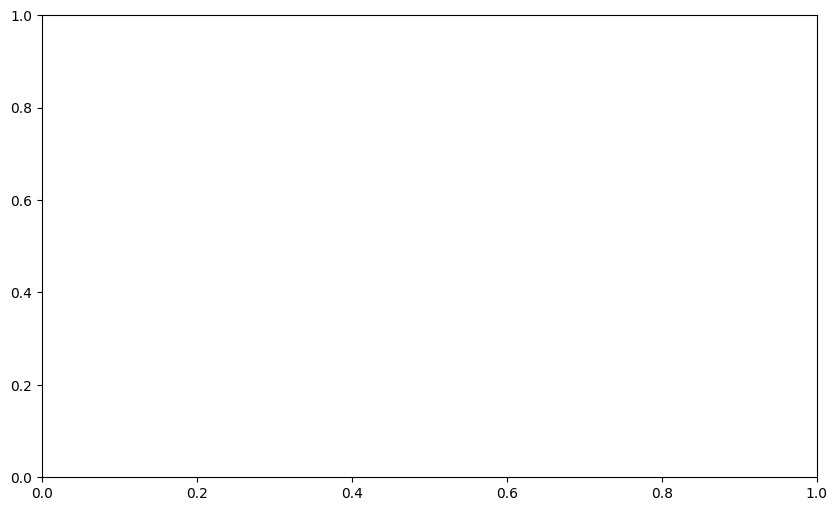

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes un DataFrame `data_victimas` que incluye 'edad_victima' y 'sexo_victima'

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=data_victimas, x='edad_victima', hue='sexo_victima', bins=20, palette='dark:red', kde=True)

# Configurar título y etiquetas
plt.title('Distribución de Edad y Género de las Víctimas')
plt.xlabel('Edad de la Víctima')
plt.ylabel('Cantidad de Víctimas')

# Ajustar la visualización
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes un DataFrame `data_victimas` que incluye 'edad_victima' y 'sexo_victima'

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=data_victimas, x='edad_victima', hue='sexo_victima', bins=20, palette='dark:red', kde=True)

# Configurar título y etiquetas
plt.title('Distribución de Edad y Género de las Víctimas')
plt.xlabel('Edad de la Víctima')
plt.ylabel('Cantidad de Víctimas')

# Ajustar la visualización
plt.tight_layout()
plt.show()


Edad de las Víctimas:

Conclusión Principal: Las personas jóvenes (en edades de 18 a 4o años) suelen ser las más afectadas, lo que puede estar relacionado con comportamientos de mayor riesgo, como el exceso de velocidad o la conducción bajo efectos del alcohol.
Implicación: Las campañas de concientización deben estar dirigidas a este grupo etario, incluyendo intervenciones educativas y controles específicos de alcohol y velocidad.

In [ ]:
data_hechos

In [ ]:
# Graficar como líneas
plt.figure(figsize=(12, 6))
for column in accidents_per_year_vehicle.columns:
    plt.plot(accidents_per_year_vehicle.index, accidents_per_year_vehicle[column], marker='o', label=column)

# Configurar título y etiquetas
plt.title('Total de Accidentes por Año y Tipo de Vehículo Acusado', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Accidentes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Vehículo Acusado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()







Distribución de Accidentes por Año:

Conclusión Principal: Existe una tendencia estable o fluctuante en la cantidad de accidentes a lo largo de los años analizados. Si se observa un aumento o disminución significativa en un año en particular, puede estar relacionado con cambios en las políticas de tránsito, el crecimiento poblacional o mejoras en la infraestructura vial.
Implicación: Los responsables de políticas de seguridad vial deben examinar las posibles causas detrás de los cambios anuales en los siniestros y ajustar sus intervenciones en función de estos patrones históricos.

In [ ]:
data_hechos['hora'] = data_hechos['hora'].astype(int)

In [ ]:
plt.figure(figsize=(10, 6))

# Usar un gráfico de área
sns.lineplot(x=accidents_per_hour.index, y=accidents_per_hour.values, marker='o', color='darkred')
plt.fill_between(accidents_per_hour.index, accidents_per_hour.values, color='darkred', alpha=0.3)

# Configurar título y etiquetas
plt.title('Total de Accidentes por Hora', fontsize=14)
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Cantidad de Accidentes', fontsize=12)

# Ajustar la visualización
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Distribución Horaria de los Accidentes:

Conclusión Principal: Los siniestros suelen concentrarse en horarios específicos, como las horas pico de tráfico (mañana y tarde) o en la madrugada, lo cual podría estar relacionado con la fatiga, el consumo de alcohol, o una mayor densidad vehicular.
Implicación: Es crucial reforzar las medidas de control durante las horas críticas para prevenir accidentes, como mayor presencia policial y control de velocidad en horarios de mayor riesgo.

In [ ]:
# Verificar los datos únicos en la columna 'mes'
print(data_hechos['mes'].unique())


In [ ]:
# Convertir la columna 'mes' a nombres de meses si es necesario
mes_mapping = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Si la columna 'mes' contiene números, conviértelos a nombres
data_hechos['mes'] = data_hechos['mes'].map(mes_mapping)

# Crear una tabla de conteo y ordenarla por mes
accidents_per_month = data_hechos['mes'].value_counts().reindex([
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
])

# Graficar
plt.figure(figsize=(12, 6))
# Usar una paleta de colores más variada
palette = sns.color_palette("BuGn", len(accidents_per_month))

ax = sns.barplot(x=accidents_per_month.index, y=accidents_per_month.values, palette=palette)

# Añadir etiquetas encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Configurar título y etiquetas
plt.title('Total de Accidentes por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de Accidentes', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir líneas de cuadrícula
plt.tight_layout()
plt.show()





Accidentes por Mes:

Conclusión Principal: Se observa una variación en el número de accidentes a lo largo de los meses del año, posiblemente con picos en meses específicos (por ejemplo, vacaciones de verano o meses de alta movilidad).
Implicación: Las campañas de prevención y los operativos de control de tránsito pueden intensificarse en los meses con mayor número de accidentes para reducir la probabilidad de siniestros.

In [22]:
# Reemplazar 'General Paz' por 'Autopista' en la columna 'tipo_de_calle'
data_homicidios['tipo_de_calle'] = data_homicidios['tipo_de_calle'].replace('gral paz', 'autopista')
# Reemplazar 'General Paz' por 'Autopista' en la columna 'tipo_de_calle'
data_homicidios['tipo_de_calle'] = data_homicidios['tipo_de_calle'].replace('Autopista', 'autopista')


In [ ]:

# Contar accidentes por tipo de calle
accidents_per_street_type = data_homicidios['tipo_de_calle'].value_counts()

# Crear el gráfico con una paleta personalizada de tonos rojos
plt.figure(figsize=(12, 6))
colors = ['#8B0000', '#CD5C5C', '#F08080', '#FFB6C1', '#FF7F50']  # Colores en tonos de rojo
ax = sns.barplot(x=accidents_per_street_type.index, y=accidents_per_street_type.values, palette=colors)

# Añadir etiquetas encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Configurar título y etiquetas
plt.title('Accidentes por Tipo de Calle', fontsize=16)
plt.xlabel('Tipo de Calle', fontsize=14)
plt.ylabel('Cantidad de Accidentes', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir líneas de cuadrícula

# Mejorar la leyenda
plt.tight_layout()
plt.show()



In [ ]:


# 7. Número de víctimas por calle en data_homicidios
victims_per_street = data_homicidios.groupby('Calle')['cantidad_victimas'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=victims_per_street.index[:10], y=victims_per_street.values[:10], palette='Purples')
plt.title('Número de Víctimas por Calle (Top 10)')
plt.xlabel('Calle')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tipos de Calle y Lugar del Accidente:

Conclusión Principal: Los siniestros ocurren con mayor frecuencia en avenidas o calles principales, lo que podría estar relacionado con una mayor cantidad de tráfico o velocidades más altas.
Implicación: Implementar mayores controles en las zonas identificadas como puntos críticos de siniestros, como mejoras en la señalización, iluminación o rediseño urbano para aumentar la seguridad.

In [ ]:




# 8. Número de accidentes por víctimas por año
accidents_by_victims_per_year = data_hechos.groupby('año')['cantidad_victimas'].sum().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_victims_per_year.index, y=accidents_by_victims_per_year.values, palette='coolwarm')
plt.title('Número de Accidentes por Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.tight_layout()
plt.show()



Participación de Vehículos:

Conclusión Principal: El análisis de los vehículos involucrados revela que ciertos tipos de vehículos, como automóviles y motocicletas, tienen una participación desproporcionada en los accidentes. Las motocicletas, en particular, pueden estar sobre-representadas en los accidentes graves.
Implicación: Este hallazgo indica la necesidad de campañas específicas para conductores de motocicletas, así como posibles reformas en la normativa de tránsito para este tipo de vehículos.

Cantidad de Víctimas por Accidente:

Conclusión Principal: La mayoría de los accidentes involucran una única víctima, aunque hay una cantidad notable de incidentes con múltiples víctimas, lo que resalta la gravedad de ciertos siniestros.
Implicación: Es fundamental entender las características de los accidentes más graves para diseñar políticas específicas que reduzcan la probabilidad de siniestros con múltiples víctimas.

Recomendaciones:
Enfoque en Grupos Vulnerables: Dado que los hombres jóvenes son el grupo más afectado, las intervenciones deben centrarse en esta población.
Mejora de la Recolección de Datos: Se deben mejorar los datos donde haya un número considerable de valores desconocidos o no reportados, como el sexo de la víctima o los detalles del accidente.
Monitoreo Temporal: Es crucial reforzar las medidas de control y prevención en los horarios y meses críticos donde se concentra la mayoría de los accidentes.
Reducción de Siniestros Graves: Evaluar las características de los accidentes con múltiples víctimas para entender mejor qué factores contribuyen a la gravedad y trabajar en mitigarlos.
Estas conclusiones proporcionan un panorama claro de los patrones y puntos críticos relacionados con los siniestros viales en Buenos Aires, y ofrecen una base sólida para el diseño de políticas públicas más efectivas